# Titanic Data Analysis
### Sejarah Titanic
   Titanic merupakan salah satu kapal terbesar dan tercanggih yang pernah dibuat pada masanya. Bahkan saking canggihnya salah satu nahkoda Titanic yang merupakan seorang angkatan laut Inggris pernah sesumbar kalau kehendak Tuhanpun tidak akan bisa menenggelamkan kapal ini. Akan tetapi pada tahun 1912, saat mengarungi Samudra Atlantik dalam perjalanan dari Inggris ke Amerika, Titanic menabrak bongkahan es yang menyebabkan kapal terbelah menjadi dua dan mengakibatkan kematian sekitar 1500 dari 2224 penumpangnya. Kejadian yang mengenaskan tersebut sangat mengejutkan dunia, sehingga terbawa sampai sekarang. Pada tahun 1997 kisah Titanic diangkat ke layar lebar dengan dibintangi oleh Kate Winslet dan Leonardo Di Caprio yang membawa kesuksesan besar film tersebut dalam sejarah dunia perfilman dunia dengan menyabet 11 piala Oscar.
   
### Hal Penting yang terjadi
#### Titanic merupakan kapal terbesar, tercanggih dan termewah pada jamannya, tentunya melihat hal tersebut bidikan pasar penumpang Titanic adalah orang-orang berada. Makanya pada saat kapal tersebut tenggelam, penumpangnya kebanyakan adalah orang-orang terkaya di dunia dan sisanya adalah imigran yang sedang mencari penghidupan yang lebih baik dari Eropa.
#### Karena kecanggihannya, Titanic dilengkapi dengan kapal sekoci yang dapat dipergunakan pada saat darurat. Akan tetapi saat pelayarannya yang terakhir, Titanic hanya membawa setengah sekoci dari kapasitas yang tersedia dengan kapasitas angkut 1100an penumpang. Alasan logis kenapa ini terjadi, kemungkinan karena adanya mitos kalau Titanic adalah kapal yang tidak akan bisa tenggelam.
#### Dua jam setelah Titanic mengalami kecelakaan, ada kapal lain yaitu RMS Carphatia yang lewat lokasi kejadian dan berhasil menyelamatkan kurang lebih 700 penumpang.
#### Pada jaman tersebut, kalau terjadi kecelakaan, maka penyelamatan diutamakan pada wanita dan anak-anak.
#### Titanic menabrak bongkahan es pada bagian  depan kapal sebelah kanan yang menyebabkan lubang menganga pada 5 tingkat dari 16 tingkat, sehingga air dapat masuk dari lubang tersebut.
#### Sebelum berangkat ke New York, Amerika, Titanic menyinggahi 3 pelabuhan yaitu Southampton (Inggris), Cherbourg (Perancis) dan Queenstown (Irlandia)

# Big Question here: Bisakah kita menebak apakah seseorang akan selamat atau tidak berdasarkan data penumpang Titanic saat tenggelam?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [2]:
data_latih = pd.read_csv('https://raw.githubusercontent.com/imdwipayana/DATA/main/Data%20Titanic/train.csv')
data_uji = pd.read_csv('https://raw.githubusercontent.com/imdwipayana/DATA/main/Data%20Titanic/test.csv')

In [3]:
data_latih.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_uji.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data_latih.shape

(891, 12)

In [6]:
data_uji.shape

(418, 11)

In [7]:
data_latih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data_uji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
data_latih.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data_uji.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

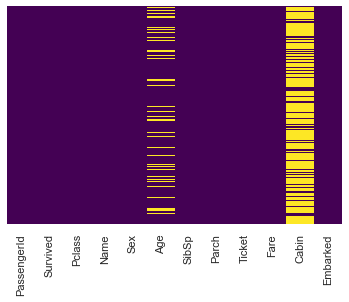

In [11]:
sns.heatmap(data_latih.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

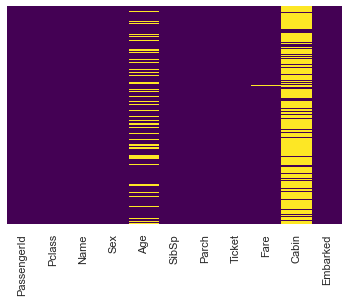

In [12]:
sns.heatmap(data_uji.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

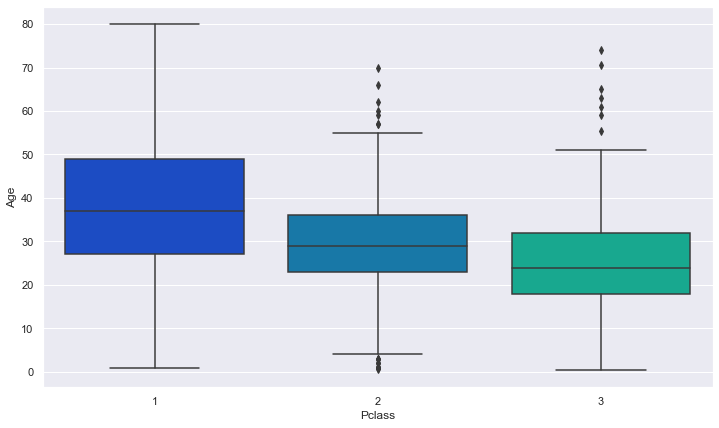

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data_latih,palette='winter')

In [14]:
def histogram(kolom_data):
    hidup = data_latih[data_latih['Survived']==1][kolom_data].value_counts()
    mati = data_latih[data_latih['Survived']==0][kolom_data].value_counts()
    df = pd.DataFrame([hidup,mati])
    df.index = ['Hidup','Mati']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

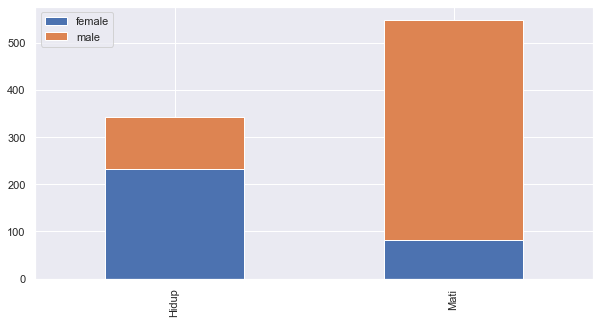

In [15]:
histogram('Sex')

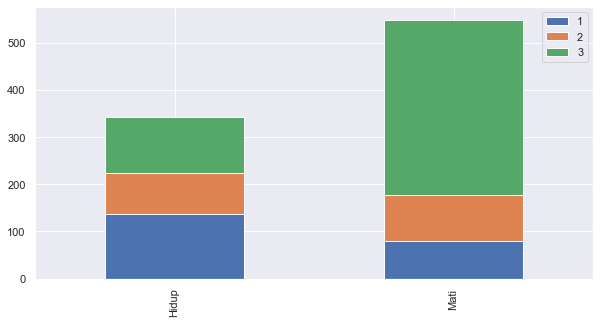

In [16]:
histogram('Pclass')

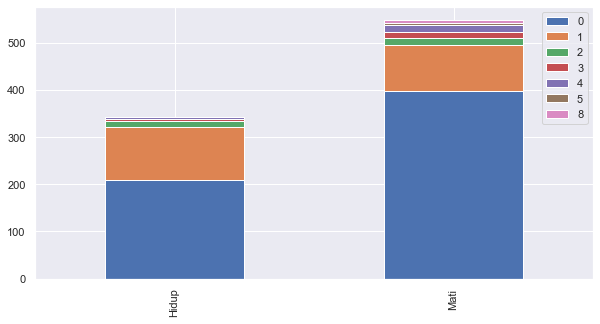

In [17]:
histogram('SibSp')

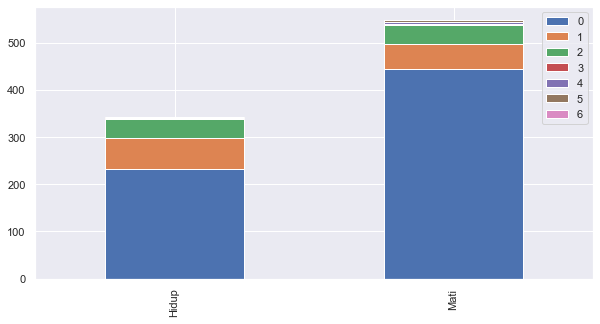

In [18]:
histogram('Parch')

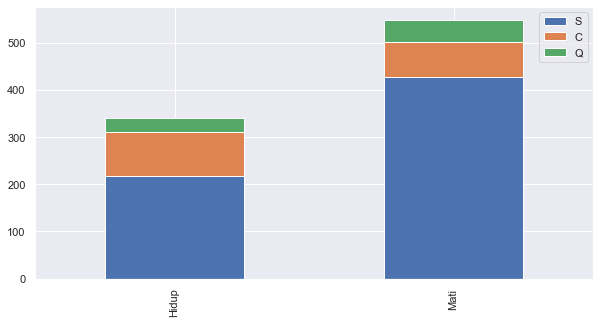

In [19]:
histogram('Embarked')

In [20]:
data_gabung = [data_latih, data_uji]

for data in data_gabung:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
data_latih['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [22]:
data_uji['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [23]:
gelar = {'Mr': 0, 'Miss': 1, 'Mrs': 2,
         'Master': 3, 'Dr': 3, 'Rev': 3, 'Col': 3, 'Major': 3, 'Mlle': 3, 'Countess': 3,
         'Ms': 3, 'Lady': 3, 'Jonkheer': 3, 'Don': 3, 'Dona': 3, 'Mme': 3, 'Capt': 3, 'Sir': 3}
for data in data_gabung:
    data['Title'] = data['Title'].map(gelar)

In [24]:
data_latih.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
data_uji.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


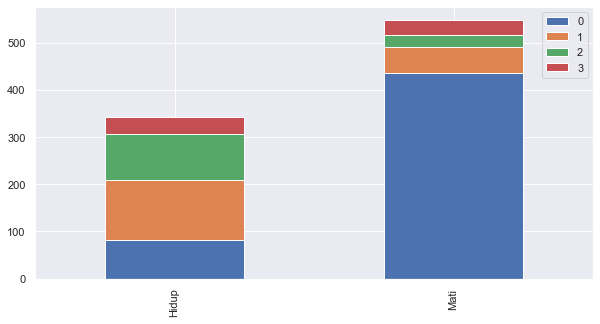

In [26]:
histogram('Title')

In [27]:
gender = {'male': 0, 'female': 1}

for data in data_gabung:
    data['Sex'] = data['Sex'].map(gender)

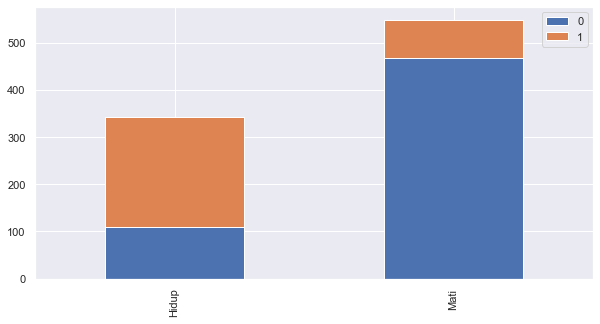

In [28]:
histogram('Sex')

In [29]:
# Age
# Data pada kolom 'Age' ada yang kosong, untuk itu kita isi data yang kosong dengan median dari 'Title'
data_latih['Age'].fillna(data_latih.groupby('Title')['Age'].transform('median'), inplace=True)
data_uji['Age'].fillna(data_uji.groupby('Title')['Age'].transform('median'), inplace=True)

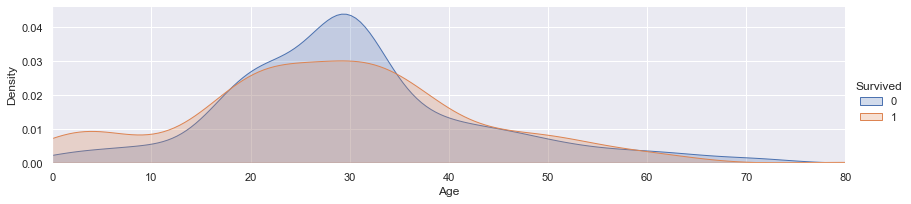

In [30]:
gambar = sns.FacetGrid(data_latih, hue='Survived',aspect=4)
gambar.map(sns.kdeplot,'Age', shade=True)
gambar.set(xlim=(0,data_latih['Age'].max()))
gambar.add_legend()

plt.show()

(10.0, 20.0)

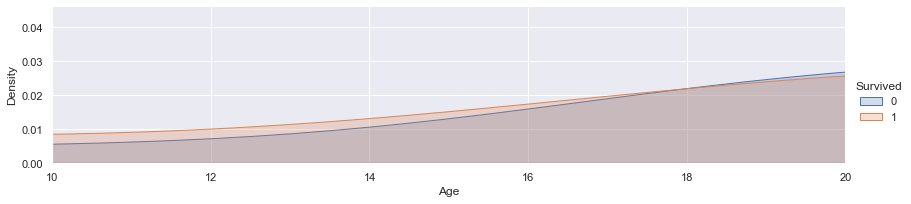

In [31]:
gambar = sns.FacetGrid(data_latih, hue='Survived',aspect=4)
gambar.map(sns.kdeplot,'Age', shade=True)
gambar.set(xlim=(0,data_latih['Age'].max()))
gambar.add_legend()
plt.xlim(10,20)

(30.0, 40.0)

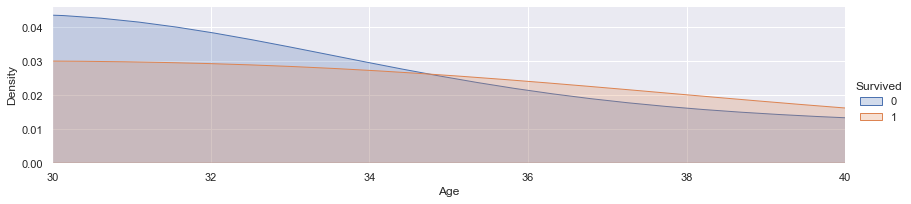

In [32]:
gambar = sns.FacetGrid(data_latih, hue='Survived',aspect=4)
gambar.map(sns.kdeplot,'Age', shade=True)
gambar.set(xlim=(0,data_latih['Age'].max()))
gambar.add_legend()
plt.xlim(30,40)

(40.0, 50.0)

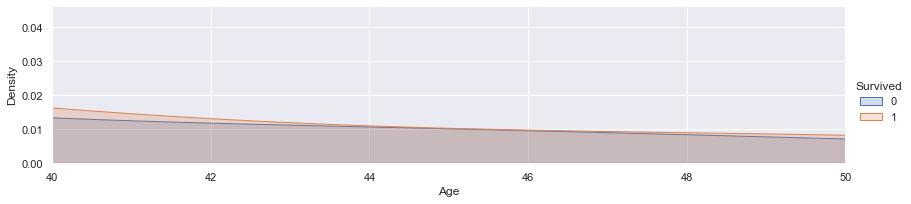

In [33]:
gambar = sns.FacetGrid(data_latih, hue='Survived',aspect=4)
gambar.map(sns.kdeplot,'Age', shade=True)
gambar.set(xlim=(0,data_latih['Age'].max()))
gambar.add_legend()
plt.xlim(40,50)

(55.0, 65.0)

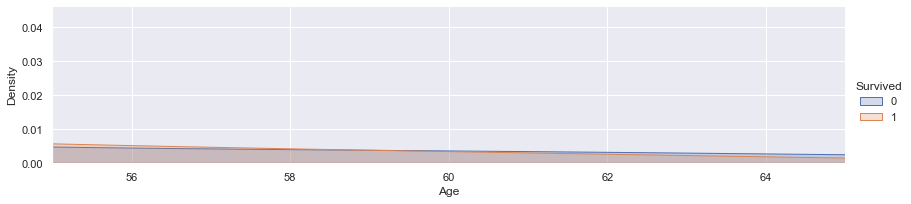

In [34]:
gambar = sns.FacetGrid(data_latih, hue='Survived',aspect=4)
gambar.map(sns.kdeplot,'Age', shade=True)
gambar.set(xlim=(0,data_latih['Age'].max()))
gambar.add_legend()
plt.xlim(55,65)

In [35]:
for data in data_gabung:
    data.loc[ data['Age'] <= 18, 'Age'] = 0
    data.loc[(data['Age'] > 18) & (data['Age'] <= 35), 'Age'] = 1
    data.loc[(data['Age'] > 35) & (data['Age'] <= 46), 'Age'] = 2
    data.loc[(data['Age'] > 46) & (data['Age'] <= 59), 'Age'] = 3
    data.loc[ data['Age'] > 59, 'Age'] = 4

In [36]:
data_latih.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,8.0500,NaN,S,0


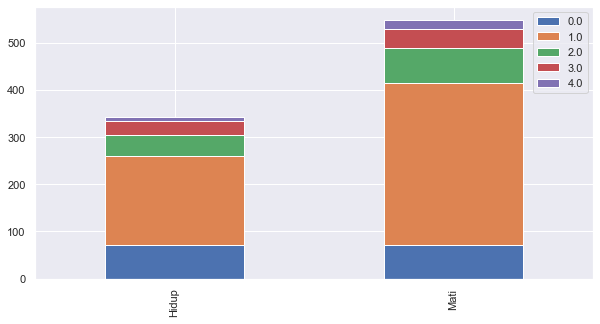

In [37]:
histogram('Age')

In [38]:
 #Embarked

<AxesSubplot:>

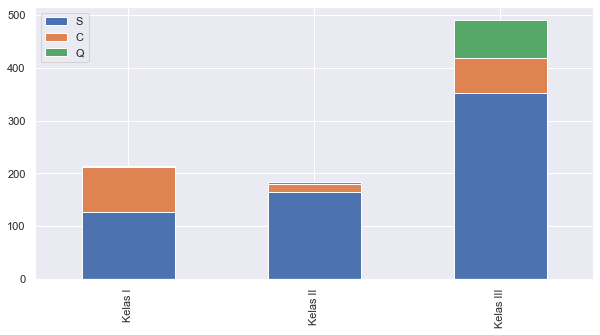

In [39]:
Pclass1 = data_latih[data_latih['Pclass']==1]['Embarked'].value_counts()
Pclass2 = data_latih[data_latih['Pclass']==2]['Embarked'].value_counts()
Pclass3 = data_latih[data_latih['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index =['Kelas I', 'Kelas II', 'Kelas III']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [40]:
embarked = {'S':0, 'C':1, 'Q':2}
for data in data_gabung:
    data['Embarked']=data['Embarked'].map(embarked)

In [41]:
data_latih['Embarked'].fillna(data_latih.groupby('Pclass')['Embarked'].transform('median'),inplace=True)
data_uji['Embarked'].fillna(data_uji.groupby('Pclass')['Embarked'].transform('median'),inplace=True)

In [42]:
#Fare

In [43]:
data_latih['Fare'].fillna(data_latih.groupby('Pclass')['Fare'].transform('median'),inplace=True)
data_uji['Fare'].fillna(data_uji.groupby('Pclass')['Fare'].transform('median'),inplace=True)

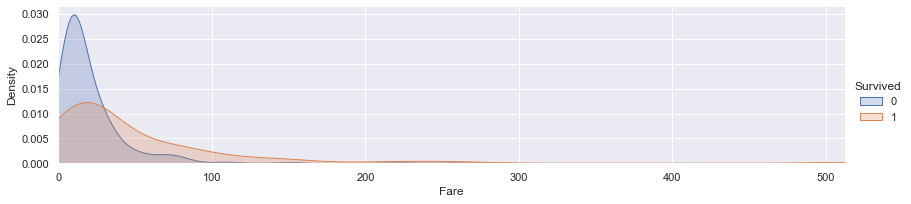

In [44]:
gambar = sns.FacetGrid(data_latih,hue='Survived',aspect=4)
gambar.map(sns.kdeplot,'Fare',shade=True)
gambar.set(xlim=(0,data_latih['Fare'].max()))
gambar.add_legend()

plt.show()

(0.0, 40.0)

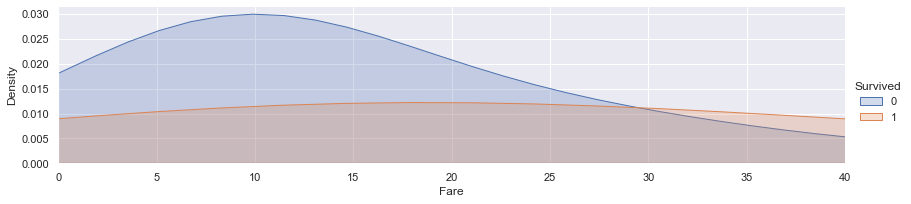

In [45]:
gambar = sns.FacetGrid(data_latih,hue='Survived',aspect=4)
gambar.map(sns.kdeplot,'Fare',shade=True)
gambar.set(xlim=(0,data_latih['Fare'].max()))
gambar.add_legend()
plt.xlim(0,40)

In [46]:
for data in data_gabung:
    data.loc[ data['Fare'] <= 30, 'Fare'] = 0
    data.loc[(data['Fare'] > 30) & (data['Fare'] <= 45), 'Fare'] = 1
    data.loc[(data['Fare'] > 45) & (data['Fare'] <= 60), 'Fare'] = 2
    data.loc[ data['Fare'] > 60, 'Fare'] = 3

In [47]:
data_latih.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3.0,C85,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,2.0,C123,0.0,2
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,0.0,NaN,0.0,0


In [48]:
# Cabin

In [49]:
data_latih.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [50]:
for data in data_gabung:
    data['Cabin'] = data['Cabin'].str[:1]

In [51]:
data_latih.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3.0,C,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,2.0,C,0.0,2
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,0.0,NaN,0.0,0


<AxesSubplot:>

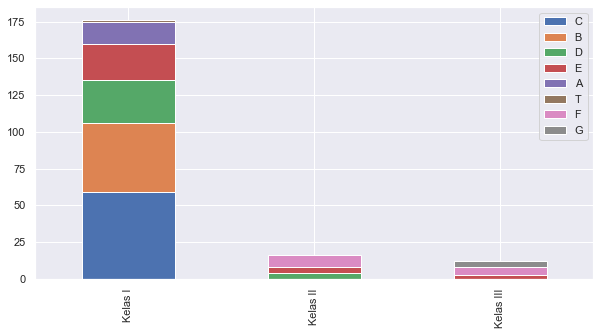

In [52]:
Pclass1 = data_latih[data_latih['Pclass']==1]['Cabin'].value_counts()
Pclass2 = data_latih[data_latih['Pclass']==2]['Cabin'].value_counts()
Pclass3 = data_latih[data_latih['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index =['Kelas I', 'Kelas II', 'Kelas III']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [53]:
cabin = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T':2.8}
for data in data_gabung:
    data['Cabin'] = data['Cabin'].map(cabin)

In [54]:
data_latih['Cabin'].fillna(data_latih.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
data_uji['Cabin'].fillna(data_uji.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [55]:
#Family Size

In [56]:
data_latih['AnggotaKeluarga'] = data_latih['SibSp'] + data_latih['Parch'] + 1
data_uji['AnggotaKeluarga'] = data_uji['SibSp'] + data_uji['Parch'] + 1

(0.0, 11.0)

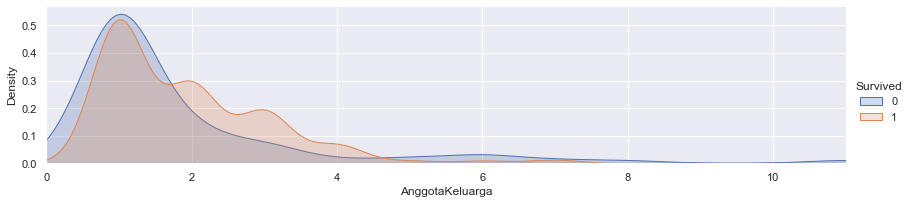

In [57]:
gambar = sns.FacetGrid(data_latih, hue='Survived',aspect=4)
gambar.map(sns.kdeplot,'AnggotaKeluarga',shade=True)
gambar.set(xlim=(0,data_latih['AnggotaKeluarga'].max()))
gambar.add_legend()
plt.xlim(0)

In [58]:
anggota_keluarga = {1:0, 2:0.4,3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for data in data_gabung:
    data['AnggotaKeluarga'] = data['AnggotaKeluarga'].map(anggota_keluarga)

In [59]:
data_latih.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AnggotaKeluarga
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0.0,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3.0,0.8,1.0,2,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0.0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,2.0,0.8,0.0,2,0.4
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,0.0,2.0,0.0,0,0.0


In [60]:
data_latih = data_latih.drop(['Ticket', 'SibSp','Parch'], axis=1)
data_uji = data_uji.drop(['Ticket', 'SibSp','Parch'], axis=1)
data_latih = data_latih.drop(['PassengerId'],axis=1)

In [61]:
data_latih.drop('Name', axis=1, inplace=True)
data_uji.drop('Name',axis=1,inplace=True)

In [62]:
data_fix_dilatih = data_latih.drop('Survived', axis=1)
target = data_latih['Survived']

In [63]:
data_fix_dilatih.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,AnggotaKeluarga
0,3,0,1.0,0.0,2.0,0.0,0,0.4
1,1,1,2.0,3.0,0.8,1.0,2,0.4
2,3,1,1.0,0.0,2.0,0.0,1,0.0
3,1,1,1.0,2.0,0.8,0.0,2,0.4
4,3,0,1.0,0.0,2.0,0.0,0,0.0


In [64]:
data_fix_dilatih.isnull().sum()

Pclass             0
Sex                0
Age                0
Fare               0
Cabin              0
Embarked           0
Title              0
AnggotaKeluarga    0
dtype: int64

In [65]:
data_uji.isnull().sum()

PassengerId        0
Pclass             0
Sex                0
Age                0
Fare               0
Cabin              0
Embarked           0
Title              0
AnggotaKeluarga    0
dtype: int64

<AxesSubplot:>

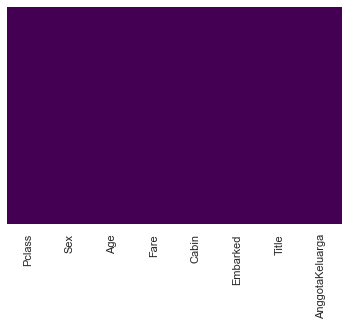

In [66]:
sns.heatmap(data_fix_dilatih.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
target.isnull().sum()

0

<AxesSubplot:>

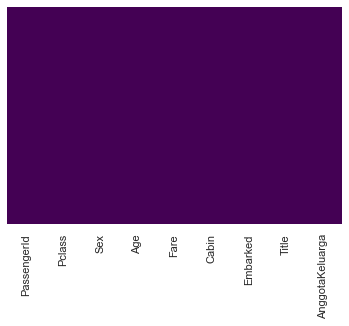

In [68]:
sns.heatmap(data_uji.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [69]:
from sklearn.svm import SVC

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [71]:
model = SVC()
score = cross_val_score(model,data_fix_dilatih,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.83333333 0.78651685 0.83146067 0.80898876 0.85393258 0.80898876
 0.83146067 0.85393258 0.83146067 0.85393258]


In [72]:
score.mean()*100

82.94007490636706

In [73]:
# Testing

In [74]:
model = SVC()
model.fit(data_fix_dilatih,target)
test_data = data_uji.drop('PassengerId',axis=1).copy()
prediction = model.predict(test_data)

In [75]:
submission = pd.DataFrame({
    'PassengerId': data_uji['PassengerId'],
    'Survived': prediction
})
submission.to_csv('submission.csv',index=False)

In [76]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [77]:
data_fix_dilatih.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,AnggotaKeluarga
0,3,0,1.0,0.0,2.0,0.0,0,0.4
1,1,1,2.0,3.0,0.8,1.0,2,0.4
2,3,1,1.0,0.0,2.0,0.0,1,0.0
3,1,1,1.0,2.0,0.8,0.0,2,0.4
4,3,0,1.0,0.0,2.0,0.0,0,0.0


1. Pclass = Kelas Penumpang [1,2,3]
2. Sex = Jenis Kelamin [Perempuan=1, Laki-laki=0]
3. Age = Umur [<18 = 0, 18-35=1,35-46=2, 46-59=3, >59 = 4]
4. Fare = Harga Tiket [<=30 = 0, 30-45 = 1, 45-60 = 2, >60 = 3]
5. Cabin = Ruangan [A=0, B=0.4, C=0.8, D=1.2, E=1.6, F=2.0, G=2.4, T=2.8]
6. Embarked = Pelabuhan Keberangkatan [S=0, C=1, Q=2]
7. Title = Gelar [{'Mr': 0, 'Miss': 1, 'Mrs': 2,
         'Master': 3, 'Dr': 3, 'Rev': 3, 'Col': 3, 'Major': 3, 'Mlle': 3, 'Countess': 3,
         'Ms': 3, 'Lady': 3, 'Jonkheer': 3, 'Don': 3, 'Dona': 3, 'Mme': 3, 'Capt': 3, 'Sir': 3}]
8. AnggotaKeluarha = Jumlah anggota keluarga [1=0, 2=0.4, 3=0.8, 4=1.2, 5=1.6, 6=2.0, 7=2.4, 8=2.8, 9=3.2, 10=3.6, 11=4.0]

In [78]:
data_saya = [[1,1,2,3, 0, 0, 0,1.2]]

prediksi = model.predict(data_saya)
print(prediksi)

if prediksi == 0:
    print("Hiks, Turut Berdukacita")
else:
    print('Yey.. Kamu masih hidup!!')

[1]
Yey.. Kamu masih hidup!!
